In [1]:
pip install netCDF4

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [2]:
import netCDF4

In [3]:
uzastopni_suvi_dani = netCDF4.Dataset('obs_cdd_vre_1950-2020_na_na_na_g_eobs.nc', 'r')
tropski_dani = netCDF4.Dataset('obs_hwfi_vre_1950-2020_na_na_na_g_eobs.nc', 'r')
indeks_aridnosti = netCDF4.Dataset('obs_fai_vre_1950-2020_na_na_na_g_eobs.nc','r')
vegetacioni_period = netCDF4.Dataset('obs_gsl10_vre_1950-2020_na_na_na_g_eobs.nc', 'r')

In [4]:
print(uzastopni_suvi_dani)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    CDI: Climate Data Interface version 1.9.9 (https://mpimet.mpg.de/cdi)
    Conventions: CF-1.6
    pod: obs
    var: cdd
    viz: vre
    baz: 1950-2020
    ppr: na
    sce: na
    zag: na
    sez: g
    mod: eobs
    ccols: 255 255 212; 254 227 145; 254 196 79; 254 153 41; 236 112 20; 204 76 2; 140 45 4
    clevs: 20 22 24 26 28 30
    NCO: netCDF Operators version 4.8.1 (Homepage = http://nco.sf.net, Code = http://github.com/nco/nco)
    history: Done
    dimensions(sizes): time(71), longitude(46), latitude(48)
    variables(dimensions): float64 time(time), float64 longitude(longitude), float64 latitude(latitude), float32 cdd(time, latitude, longitude)
    groups: 


In [5]:
print(uzastopni_suvi_dani.variables)

{'time': <class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    units: days since 1955-1-1 00:00:00
    calendar: standard
    axis: T
unlimited dimensions: time
current shape = (71,)
filling off, 'longitude': <class 'netCDF4._netCDF4.Variable'>
float64 longitude(longitude)
    standard_name: longitude
    long_name: Longitude values
    units: degrees_east
    axis: X
unlimited dimensions: 
current shape = (46,)
filling off, 'latitude': <class 'netCDF4._netCDF4.Variable'>
float64 latitude(latitude)
    standard_name: latitude
    long_name: Latitude values
    units: degrees_north
    axis: Y
unlimited dimensions: 
current shape = (48,)
filling off, 'cdd': <class 'netCDF4._netCDF4.Variable'>
float32 cdd(time, latitude, longitude)
    long_name: Consecutive dry days is the greatest number of consecutive days per time period with daily precipitation amount below 1 mm. The time period should be defined by the bounds of the time coordinate.
    units: No.days
 

In [6]:
print(tropski_dani.variables)

{'time': <class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    units: days since 1955-1-1 00:00:00
    calendar: standard
    axis: T
unlimited dimensions: time
current shape = (71,)
filling off, 'longitude': <class 'netCDF4._netCDF4.Variable'>
float64 longitude(longitude)
    standard_name: longitude
    long_name: Longitude values
    units: degrees_east
    axis: X
unlimited dimensions: 
current shape = (46,)
filling off, 'latitude': <class 'netCDF4._netCDF4.Variable'>
float64 latitude(latitude)
    standard_name: latitude
    long_name: Latitude values
    units: degrees_north
    axis: Y
unlimited dimensions: 
current shape = (48,)
filling off, 'hwfi': <class 'netCDF4._netCDF4.Variable'>
float32 hwfi(time, latitude, longitude)
    long_name: Number of warm spell periods per time period. The time period should be defined by the bounds of the time coordinate.
    units: No.HW
    _FillValue: -9999.0
    missing_value: -9999.0
unlimited dimensions: time
c

In [7]:
import pandas as pd
import xarray as xr

In [8]:
time = uzastopni_suvi_dani.variables['time'][:]
lat = uzastopni_suvi_dani.variables['latitude'][:]
long = uzastopni_suvi_dani.variables['longitude'][:]

In [9]:
import itertools

In [10]:
coords = list(itertools.product(time,lat, long))

In [11]:
df = pd.DataFrame(coords, columns=['time', 'latitude', 'longitude'])

In [12]:
df['Uzastopni suvi dani'] = uzastopni_suvi_dani.variables['cdd'][:].flatten()

In [13]:
df['Uzastopni suvi dani'].isnull().sum()

66030

In [14]:
df

,time,latitude,longitude,Uzastopni suvi dani
0,-1462.0,41.649861,18.64986,NaN
1,-1462.0,41.649861,18.74986,NaN
2,-1462.0,41.649861,18.84986,NaN
3,-1462.0,41.649861,18.94986,NaN
4,-1462.0,41.649861,19.04986,NaN
...,...,...,...,...
156763,24106.0,46.349861,22.74986,NaN
156764,24106.0,46.349861,22.84986,NaN
156765,24106.0,46.349861,22.94986,NaN
156766,24106.0,46.349861,23.04986,NaN


In [15]:
def extract_region(df, lat_min, lat_max, lon_min, lon_max):
    """
    Filters the DataFrame for a specific latitude and longitude range.

    Parameters:
    - df (pd.DataFrame): The input DataFrame containing 'latitude' and 'longitude' columns.
    - lat_min (float): Minimum latitude value.
    - lat_max (float): Maximum latitude value.
    - lon_min (float): Minimum longitude value.
    - lon_max (float): Maximum longitude value.

    Returns:
    - pd.DataFrame: Filtered DataFrame containing only the specified region.
    """
    filtered_df = df[
        (df["latitude"] >= lat_min) & (df["latitude"] <= lat_max) &
        (df["longitude"] >= lon_min) & (df["longitude"] <= lon_max)
    ]
    return filtered_df

In [16]:
df = pd.DataFrame(coords, columns=['time', 'latitude', 'longitude'])

In [17]:
backa_uzast_suvi_dani = extract_region(df, 45.4, 45.5, 20.0, 20.1)

In [18]:

backa_uzast_suvi_dani

,time,latitude,longitude
1762,-1462.0,45.449861,20.04986
3970,-1097.0,45.449861,20.04986
6178,-731.0,45.449861,20.04986
8386,-366.0,45.449861,20.04986
10594,-1.0,45.449861,20.04986
...,...,...,...
147490,22645.0,45.449861,20.04986
149698,23010.0,45.449861,20.04986
151906,23375.0,45.449861,20.04986
154114,23740.0,45.449861,20.04986


In [19]:
time1 = indeks_aridnosti.variables['time'][:]
lat1 = indeks_aridnosti.variables['latitude'][:]
long1 = indeks_aridnosti.variables['longitude'][:]

In [20]:
coords1 = list(itertools.product(time1,lat1, long1))

In [21]:
df1 = pd.DataFrame(coords1, columns=['time', 'latitude', 'longitude'])
df1['Indeks Aridnosti'] = indeks_aridnosti.variables['fai'][:].flatten()

In [22]:
backa_indeks_aridnosti = extract_region(df1, 45.4, 45.5, 20.0, 20.1)

In [23]:

backa_indeks_aridnosti

,time,latitude,longitude,Indeks Aridnosti
1762,211,45.449861,20.04986,15.363520
3970,576,45.449861,20.04986,7.853117
6178,942,45.449861,20.04986,18.661864
8386,1307,45.449861,20.04986,5.099235
10594,1672,45.449861,20.04986,5.614966
...,...,...,...,...
147490,24318,45.449861,20.04986,6.290506
149698,24683,45.449861,20.04986,16.798215
151906,25048,45.449861,20.04986,7.033543
154114,25413,45.449861,20.04986,7.454716


In [24]:
time2 = vegetacioni_period.variables['time'][:]
lat2 = vegetacioni_period.variables['latitude'][:]
long2 = vegetacioni_period.variables['longitude'][:]

In [25]:
coords2 = list(itertools.product(time2,lat2, long2))

In [26]:
df2 = pd.DataFrame(coords2, columns = ['time', 'latitude', 'longitude'])
df2['Vegetacioni period'] = vegetacioni_period.variables['gsl10'][:].flatten()

In [27]:
backa_vegetacioni_period = extract_region(df2, 45.4, 45.5, 20.0, 20.1)

In [28]:

backa_vegetacioni_period

,time,latitude,longitude,Vegetacioni period
1762,-1462.0,45.449861,20.04986,194.0
3970,-1097.0,45.449861,20.04986,187.0
6178,-731.0,45.449861,20.04986,182.0
8386,-366.0,45.449861,20.04986,191.0
10594,-1.0,45.449861,20.04986,197.0
...,...,...,...,...
147490,22645.0,45.449861,20.04986,190.0
149698,23010.0,45.449861,20.04986,216.0
151906,23375.0,45.449861,20.04986,226.0
154114,23740.0,45.449861,20.04986,237.0


In [29]:
backa_vegetacioni_period = backa_vegetacioni_period.reset_index(drop = True)
backa_indeks_aridnosti = backa_indeks_aridnosti.reset_index(drop = True)

In [30]:
backa_vegetacioni_period['Vegetacioni period'] = backa_vegetacioni_period['Vegetacioni period'].astype(float)
backa_indeks_aridnosti['Indeks Aridnosti'] = backa_indeks_aridnosti['Indeks Aridnosti'].astype(float)

In [31]:

df_grouped = backa_indeks_aridnosti.groupby(['latitude', 'longitude'])['Indeks Aridnosti'].mean().reset_index()
backa_klima = backa_vegetacioni_period.merge(df_grouped, on= ['latitude', 'longitude'], how='inner')

In [32]:
backa_klima

,time,latitude,longitude,Vegetacioni period,Indeks Aridnosti
0,-1462.0,45.449861,20.04986,194.0,8.753034
1,-1097.0,45.449861,20.04986,187.0,8.753034
2,-731.0,45.449861,20.04986,182.0,8.753034
3,-366.0,45.449861,20.04986,191.0,8.753034
4,-1.0,45.449861,20.04986,197.0,8.753034
...,...,...,...,...,...
66,22645.0,45.449861,20.04986,190.0,8.753034
67,23010.0,45.449861,20.04986,216.0,8.753034
68,23375.0,45.449861,20.04986,226.0,8.753034
69,23740.0,45.449861,20.04986,237.0,8.753034


In [33]:

years = list(range(1950, 2021))  # From 1950 to 2020


# Assign years using a for loop
for i in range(len(backa_klima)):
    backa_klima.at[i, 'time'] = years[i % len(years)]

# Convert the 'time' column to integers (optional)
backa_klima['time'] = backa_klima['time'].astype(int)

backa_klima

,time,latitude,longitude,Vegetacioni period,Indeks Aridnosti
0,1950,45.449861,20.04986,194.0,8.753034
1,1951,45.449861,20.04986,187.0,8.753034
2,1952,45.449861,20.04986,182.0,8.753034
3,1953,45.449861,20.04986,191.0,8.753034
4,1954,45.449861,20.04986,197.0,8.753034
...,...,...,...,...,...
66,2016,45.449861,20.04986,190.0,8.753034
67,2017,45.449861,20.04986,216.0,8.753034
68,2018,45.449861,20.04986,226.0,8.753034
69,2019,45.449861,20.04986,237.0,8.753034


In [34]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [35]:
# Define a binary drought label (Threshold for drought, e.g., aridity index < 10)
backa_klima['Drought'] = np.where(backa_klima['Indeks Aridnosti'] < 0.5, 1, 0)  # 1 = Drought, 0 = No Drought

In [36]:
backa_klima

,time,latitude,longitude,Vegetacioni period,Indeks Aridnosti,Drought
0,1950,45.449861,20.04986,194.0,8.753034,0
1,1951,45.449861,20.04986,187.0,8.753034,0
2,1952,45.449861,20.04986,182.0,8.753034,0
3,1953,45.449861,20.04986,191.0,8.753034,0
4,1954,45.449861,20.04986,197.0,8.753034,0
...,...,...,...,...,...,...
66,2016,45.449861,20.04986,190.0,8.753034,0
67,2017,45.449861,20.04986,216.0,8.753034,0
68,2018,45.449861,20.04986,226.0,8.753034,0
69,2019,45.449861,20.04986,237.0,8.753034,0


In [40]:
def drought_category(ai):
    if ai < 0.05:
        return 1.0  # Severe Drought (Ekstremna suša)
    elif ai < 0.20:
        return 0.8  # Moderate Drought (Jaka suša)
    elif ai < 0.50:
        return 0.6  # Mild Drought (Umerena suša)
    else:
        return 0.0  # No Drought (Nema suše)



In [41]:
backa_klima['Susa'] = backa_klima.apply(lambda row: drought_category(row['Indeks Aridnosti']), axis=1)

In [43]:
backa_klima = backa_klima.drop(columns='Drought')

In [42]:
bins = [0, 0.4, 0.6, 0.8, 1.0]
labels = ['No Drought', 'Mild Drought', 'Moderate Drought', 'Severe Drought']
backa_klima['Susa_Binned'] = pd.cut(backa_klima['Susa'], bins=bins, labels=labels, right=False)


In [44]:
backa_klima

,time,latitude,longitude,Vegetacioni period,Indeks Aridnosti,Susa,Susa_Binned
0,1950,45.449861,20.04986,194.0,8.753034,0.0,No Drought
1,1951,45.449861,20.04986,187.0,8.753034,0.0,No Drought
2,1952,45.449861,20.04986,182.0,8.753034,0.0,No Drought
3,1953,45.449861,20.04986,191.0,8.753034,0.0,No Drought
4,1954,45.449861,20.04986,197.0,8.753034,0.0,No Drought
...,...,...,...,...,...,...,...
66,2016,45.449861,20.04986,190.0,8.753034,0.0,No Drought
67,2017,45.449861,20.04986,216.0,8.753034,0.0,No Drought
68,2018,45.449861,20.04986,226.0,8.753034,0.0,No Drought
69,2019,45.449861,20.04986,237.0,8.753034,0.0,No Drought


In [45]:
# Define features and target
X = backa_klima['Indeks Aridnosti'].values.reshape(-1, 1)
y = backa_klima['Susa_Binned']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [47]:
from sklearn.svm import OneClassSVM


In [48]:
# Selecting relevant features
X = backa_klima[['Indeks Aridnosti', 'Vegetacioni period']]

# Train One-Class SVM
model = OneClassSVM(nu=0.1, kernel="rbf")  # nu: proportion of outliers expected
model.fit(X)


OneClassSVM(nu=0.1)

In [50]:
#Predict anomalies (drought-like conditions)
backa_klima['Drought_Anomaly'] = model.predict(X)  # -1: Outlier (potential drought), 1: Normal

In [55]:
known_droughts = backa_klima[backa_klima['Susa'] == 1]  # Assuming 'Drought' is a known label
detected_droughts = backa_klima[backa_klima['Drought_Anomaly'] == -1]

overlap = len(set(known_droughts.index) & set(detected_droughts.index))
print(f"Correctly detected droughts: {overlap} out of {len(known_droughts)}")

Correctly detected droughts: 0 out of 0


In [56]:
model = OneClassSVM(nu=0.05, kernel="rbf", gamma=0.1)  # Adjust nu and gamma
model.fit(X)
backa_klima['Drought_Anomaly'] = model.predict(X)

In [58]:
import matplotlib.pyplot as plt

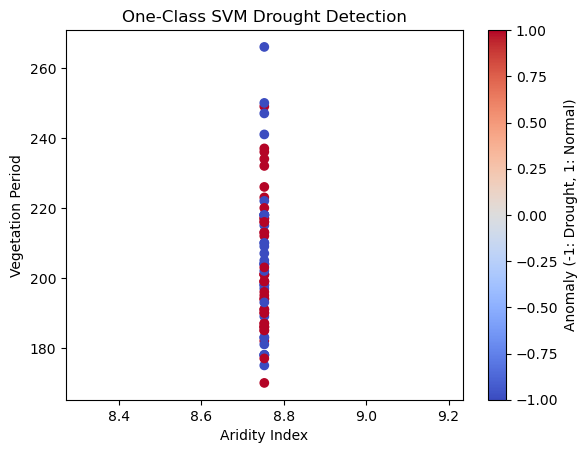

In [59]:
plt.scatter(backa_klima['Indeks Aridnosti'], backa_klima['Vegetacioni period'], c=backa_klima['Drought_Anomaly'], cmap='coolwarm')
plt.xlabel('Aridity Index')
plt.ylabel('Vegetation Period')
plt.title('One-Class SVM Drought Detection')
plt.colorbar(label='Anomaly (-1: Drought, 1: Normal)')
plt.show()
